In [ ]:
# Generate synthetic dataset
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

# Print the shapes of the data and label arrays
print("Data shape:", data.shape)
print("Label shape:", labels.shape)

Data shape: (150, 2)
Label shape: (150,)


In [ ]:
# Do a 80-20 split of the data

from sklearn.model_selection import train_test_split

res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res 

# Print the sizes of the resulting arrays
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 120
Testing set size: 30


In [ ]:
# Perform a KNN analysis of the simulated data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of k values to test
k_values = range(1, 12)

# Train and test a KNN model for each value of k
for k in k_values:

    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model to the training data
    knn.fit(train_data, train_labels)
    
    # Predict the labels for the test data
    pred_labels = knn.predict(test_data)
    
    # Compute the accuracy of the model
    accuracy = accuracy_score(test_labels, pred_labels)
    
    # Print the test accuracy for the current k value
    print("k =", k, "Test accuracy:", accuracy)


k = 1 Test accuracy: 1.0
k = 2 Test accuracy: 1.0
k = 3 Test accuracy: 1.0
k = 4 Test accuracy: 1.0
k = 5 Test accuracy: 1.0
k = 6 Test accuracy: 1.0
k = 7 Test accuracy: 1.0
k = 8 Test accuracy: 1.0
k = 9 Test accuracy: 1.0
k = 10 Test accuracy: 1.0
k = 11 Test accuracy: 1.0


In [ ]:
# Perform KNN analysis for k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_labels)
pred_labels = knn.predict(test_data)

# Compute and print the accuracy score
accuracy = accuracy_score(test_labels, pred_labels)
print("Accuracy:", accuracy)

Accuracy: 1.0


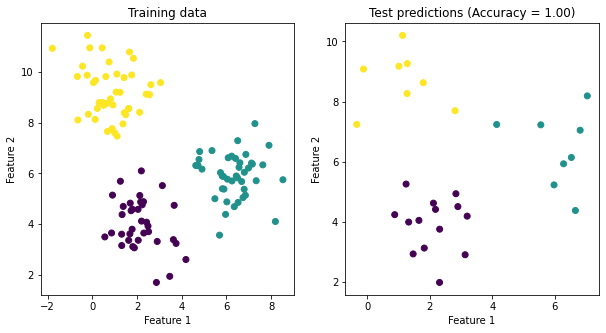

In [ ]:
# plot the simulated data/ Output accuracy Score
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
plt.title("Training data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.subplot(122)
plt.scatter(test_data[:, 0], test_data[:, 1], c=pred_labels)
plt.title("Test predictions (Accuracy = {:.2f})".format(accuracy))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

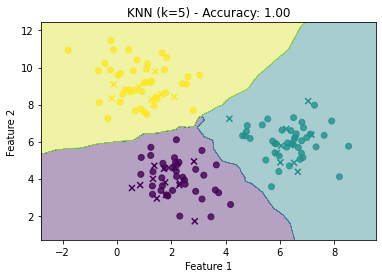

In [ ]:
# plot the KNN results
h = 0.02
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="x", linewidths=1.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN (k=5) - Accuracy: {accuracy:.2f}")
plt.show()
